# EDA-CASE STUDY-APPLICATION DATA AND PREVIOUS APPLICATION DATA

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [1]:
# filtering out warnings
import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Importing Regular Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1 - Reading and inspecting the application data set

In [3]:
#Load and read the CSV file
df_application=pd.read_csv('application_data.csv')
pd.set_option('display.max_columns', 122)

In [4]:
# Show first five rows
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Determine the shape of the dataset
df_application.shape

(307511, 122)

In [6]:
# Get Some Info about the dataset
df_application.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Describe the Numeric Variables
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# Checking the columns
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Step 2 - Data Cleaning

-  ###  Subtask 2.1: Calculating % of missing data and Handling Missing data

In [9]:
#Check for the missing data
df_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
#List out the columns having more than 50% data contains NULL values
emptydata=df_application.isnull().sum()
emptydata=emptydata[emptydata.values>(0.5*len(df_application))]
emptydata                                     

OWN_CAR_AGE                 202929
EXT_SOURCE_1                173378
APARTMENTS_AVG              156061
BASEMENTAREA_AVG            179943
YEARS_BUILD_AVG             204488
COMMONAREA_AVG              214865
ELEVATORS_AVG               163891
ENTRANCES_AVG               154828
FLOORSMIN_AVG               208642
LANDAREA_AVG                182590
LIVINGAPARTMENTS_AVG        210199
LIVINGAREA_AVG              154350
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAREA_AVG           169682
APARTMENTS_MODE             156061
BASEMENTAREA_MODE           179943
YEARS_BUILD_MODE            204488
COMMONAREA_MODE             214865
ELEVATORS_MODE              163891
ENTRANCES_MODE              154828
FLOORSMIN_MODE              208642
LANDAREA_MODE               182590
LIVINGAPARTMENTS_MODE       210199
LIVINGAREA_MODE             154350
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAREA_MODE          169682
APARTMENTS_MEDI             156061
BASEMENTAREA_MEDI           179943
YEARS_BUILD_MEDI    

In [11]:
#checking the percentage of missing data
(df_application.isnull().sum()/len(df_application.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [12]:
# findout the total no. of columns having loss of data more than 50%
len(emptydata)

41

In [13]:
# Its better to drop out these columns because we cant manipulate data having NULL values of more than 50%
emptydata=list(emptydata.index)
print(emptydata)
df_application=df_application.drop(labels=emptydata,axis=1)


['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [14]:
#checking the % of null value still in data set
(df_application.isnull().sum()/len(df_application.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

#### Columns contains missing value less than 13%:-
- The numeric columns having 13% missing values can be imputed using the mean and median.
- If the column is categorical then we prefer to impute the missing data by using the mode value.
- For numeric data coulmns, if the standard deviation is less, then the missing values can be imputed sing the mean and median.

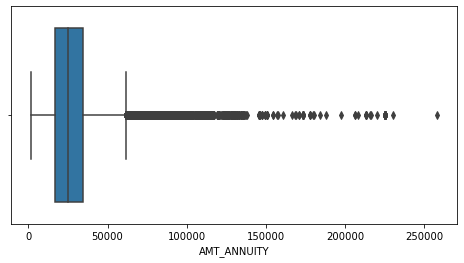

In [15]:
# AMT_ANNUITY Column contains so less missing values lets checck the outlier in the data incase present
plt.figure(figsize=[8,4])
sns.boxplot(df_application['AMT_ANNUITY'])
plt.show()

 Inference-
 - From above this plot its clear that the column AMT_ANNUITY  contains some outlier so its not a good approach to manipulate the data by mean it may affect the data so its better to manipulate the data with the median values

In [16]:
#Data manipulation on AMT_ANNUITY  by using the median value
values_med=df_application['AMT_ANNUITY'].median()
values_med
df_application.AMT_ANNUITY.fillna(values_med,inplace=True)
df_application.AMT_ANNUITY.isnull().sum()

0

In [17]:
#Lets Look some more columns contains NULL value
df_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [18]:
#lets check the data type of all columns
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [19]:
#how many data are still missing after dropping
df_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [20]:
# check all columns
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [21]:
#shape of df after dropping data
df_application.shape

(307511, 81)

-  ###  Subtask 2.2: Removing columns irrelevant for our analysis

In [22]:
# Listing out the unwanted columns and dropping the columns to analyse the data better
not_required=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','CNT_FAM_MEMBERS',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE']
df_application=df_application.drop(labels=not_required,axis=1)

In [23]:
#View the remaining columns after removing all the Unwanted columns
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [24]:
#shape of data after remove unrequired columns
df_application.shape

(307511, 30)

In [25]:
#grouping income type by using amount of income to check the amount income with type
df1=df_application.groupby(by=['NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean()
df1

NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    202955.327289
Maternity leave         140400.000000
Pensioner               136401.292273
State servant           179737.969506
Student                 170500.000000
Unemployed              110536.363636
Working                 163169.889223
Name: AMT_INCOME_TOTAL, dtype: float64

-  ###  Subtask 2.3: Handling NA values and standardizing columns

In [26]:
#Lets check some more missing values data if we look close the data then we find some values put as XNA which means the data is not available so we need to impute the datas.
df_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
#the no. of female is more as compared to male so lets put the XNA as F
df_application.loc[df_application.CODE_GENDER=='XNA','CODE_GENDER']='F'
df_application['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [28]:
#Lets check some more missing values data if we look close the data then we find some values put as XNA which means the data is not available so we need to impute the datas.
df_application['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [29]:
# % data contains in each organization type
100*(df_application['ORGANIZATION_TYPE'].value_counts()/len(df_application['ORGANIZATION_TYPE'].index))

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [30]:
# We can see that the XNA contains approximately 18% data which are not available which is 55374 so its better choice to drop the data as this may lead to affect our
# data if we impute the data with other values
XNA_data=df_application[df_application['ORGANIZATION_TYPE']=='XNA']
XNA_data
df_application=df_application.drop(labels=XNA_data.index)
df_application['ORGANIZATION_TYPE'].value_counts()
df_application['ORGANIZATION_TYPE'].shape
df_application[df_application['ORGANIZATION_TYPE']=='XNA'].shape

(0, 30)

In [31]:
#converting days to year and create a new colum as AGE
df_application['AGE']=round(df_application.DAYS_BIRTH.apply(lambda x : abs((x/365))),0)
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,55.0


-  ###  Subtask 2.4: Data Binning

In [32]:
#printing max and min age
print(df_application['AGE'].max())
print(df_application['AGE'].min())

69.0
21.0


In [33]:
#age grouping by using numpy linspace function
df_application['AGE_GROUP']=pd.cut(df_application.AGE,bins=np.linspace(20,70,11))

In [34]:
#value counts of clients in each group
df_application.AGE_GROUP.value_counts()

(35.0, 40.0]    42925
(40.0, 45.0]    39915
(30.0, 35.0]    39317
(25.0, 30.0]    34539
(45.0, 50.0]    33584
(50.0, 55.0]    29508
(20.0, 25.0]    14174
(55.0, 60.0]    12999
(60.0, 65.0]     4524
(65.0, 70.0]      652
Name: AGE_GROUP, dtype: int64

In [35]:
#binning the income to its percentiles
df_application['AMT_INCOME_TOTAL_GROUP']=pd.qcut(df_application['AMT_INCOME_TOTAL'],q=[0,0.2,0.5,0.9,1],labels=['Low','Medium','High','Very-High'])


In [36]:
#clients having total income according to groups
df_application['AMT_INCOME_TOTAL_GROUP'].value_counts()

High         85384
Low          73216
Medium       68798
Very-High    24739
Name: AMT_INCOME_TOTAL_GROUP, dtype: int64

## Step 3 - Checking Imbalance

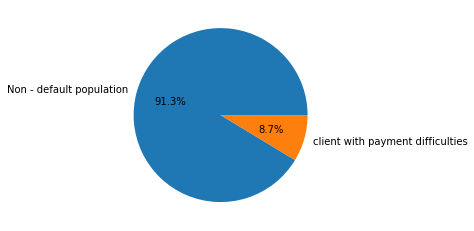

In [37]:
# Finding the imbalance in out Target variable
x = df_application['TARGET'].value_counts()[0] # Non - default population
y = df_application['TARGET'].value_counts()[1] # 1 - client with payment difficulties
plt.pie([x,y],labels=['Non - default population','client with payment difficulties'],autopct='%1.1f%%')
plt.show()

#### The ratio of data imbalance is approx 10.50

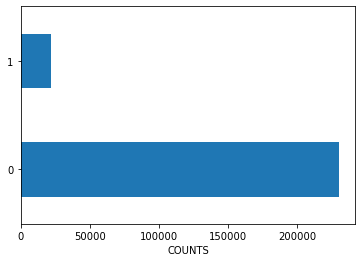

In [38]:
#value counts of defaulter and non-defaulter
df_application['TARGET'].value_counts().plot.barh()
plt.xlabel('COUNTS')
plt.show()

#### Inference:-
- The count of no. of non-defaulters are more than that of defaulters and the ration is around 10.50

## Step 4 - Analysing Data with respect to Defaulters and Non-defaulters

In [39]:
# Breaking the data set into two separate dataframes

df_target0 = df_application[df_application.TARGET==0]
df_target1 = df_application[df_application.TARGET==1]

In [40]:
# Creating a re-usable function for univariate analysis of categorical variables
def myplotfunc(var):
    plt.figure(figsize=(18,5))
    plt.subplot(1, 2, 1)
    sns.color_palette("Set2")
    sns.countplot(var, data=df_target0,hue='CODE_GENDER',palette=['#432371',"#FAAE7B","#f3913a","#efd566","#4fadcf","#f6639b"])
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=df_target1,hue='CODE_GENDER',palette=['#432371',"#FAAE7B","#f3913a","#efd566","#4fadcf","#f6639b"])
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

-  ###  Subtask 4.1: Univariate Analysis - Categorical Unorderd variable with Segemnted Analysis for Male and Female

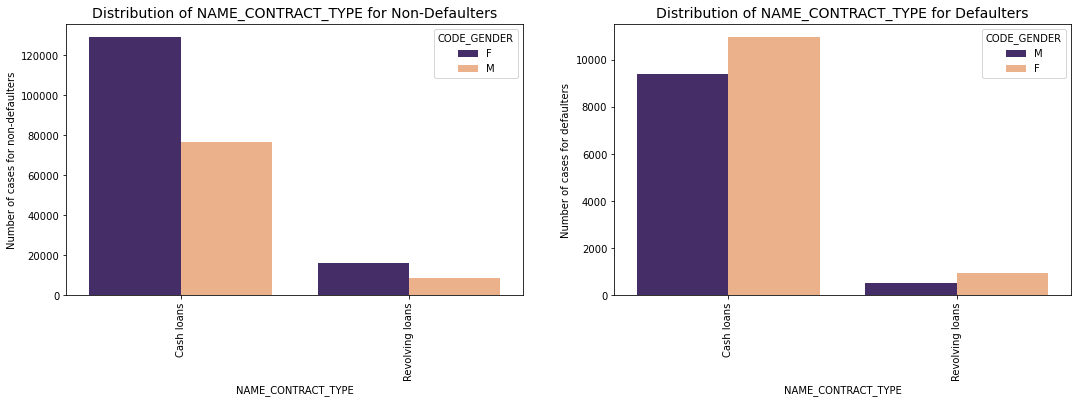

In [41]:
myplotfunc('NAME_CONTRACT_TYPE')

####   **Inference** - 
- Revolving loans are lesser in the defaulted population
- Comparing both the plots it seems like the percentage of male for cash loans in defaulters are more than that of others

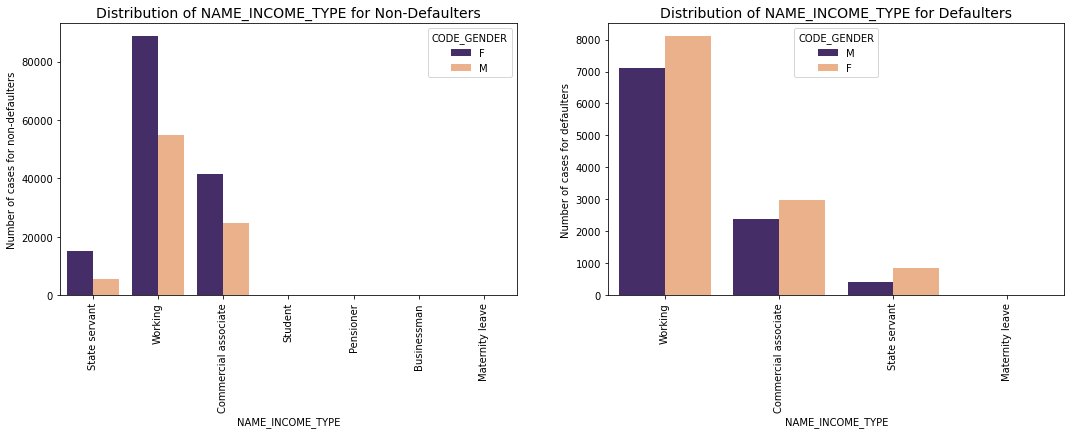

In [42]:
myplotfunc('NAME_INCOME_TYPE')

#### **Inference** - 
- Most of the defaluters are in the working population, the reason may be this income_type apply for more laons
- Most of the defaulters are female and belongs to working type.

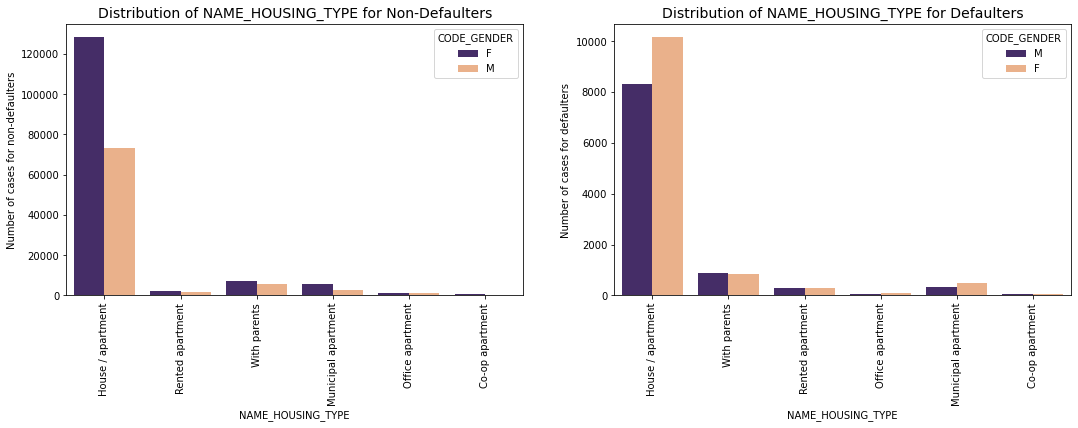

In [43]:
myplotfunc('NAME_HOUSING_TYPE')

#### **Inference**
Population living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the Defaulted population as compared to non defaulted population. Living in rental apartment means a cash outflow towards rent and thus less cash left for repayment of loan. Living with parents may suggest that the income is not too high and thus difficulty in repayment of loan.

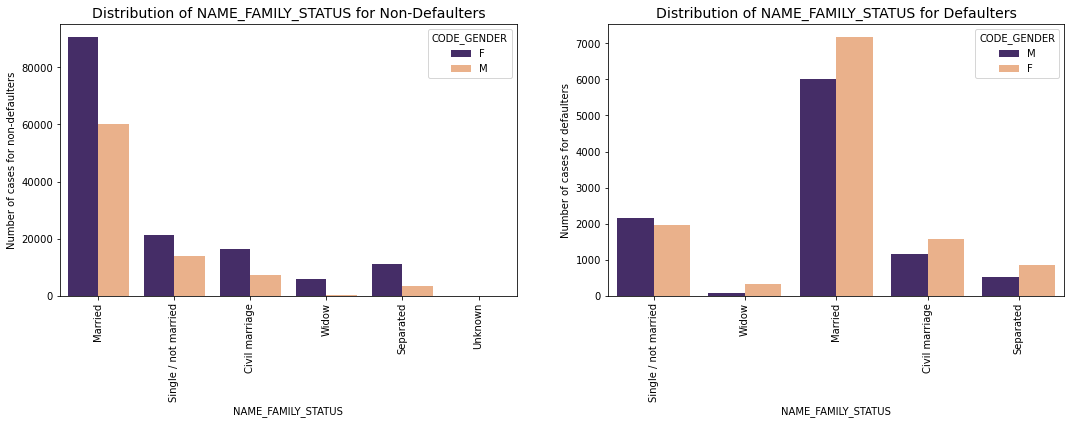

In [44]:
myplotfunc('NAME_FAMILY_STATUS')

#### **Inference** - 
- Single male applicants have comparitively more defaulters than the female applicants
- Married male are more no. of defaulters in percentage than the married female

-  ###  Subtask 4.2: Univariate Analysis - Categorical Ordered variable with Segmented Analysis for Male and Female

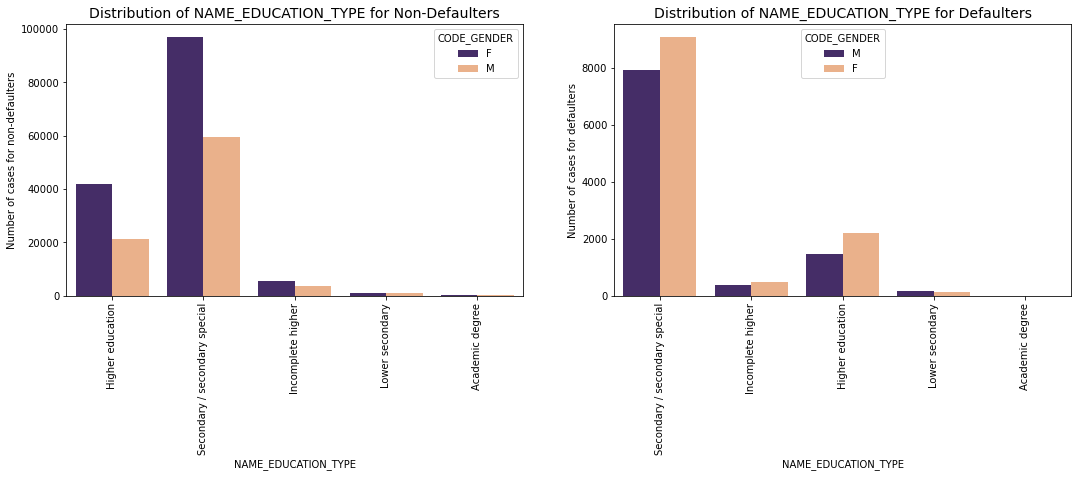

In [45]:
myplotfunc('NAME_EDUCATION_TYPE')

#### **Inferences**-
- Defaults from the clients with Academic degree are quite low.
- Approving application from clients having secondary/secondary special is a risk  as they have more defaults. The no. of female defaulters is more than that of males.
- Clients having secondary/secondary special took more loan as compared to others.

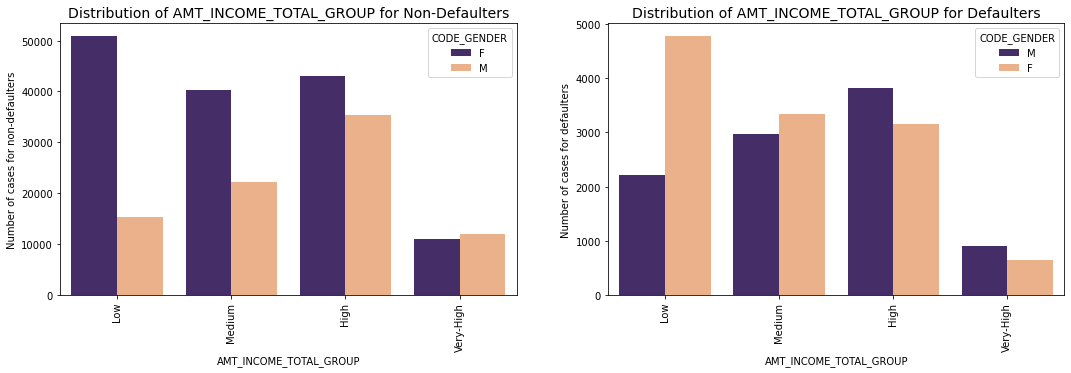

In [46]:
myplotfunc('AMT_INCOME_TOTAL_GROUP')

#### **Inference** -
- The percentage of clients having Low income male category have higher defaulters.
- Female clients are more than that of male clients 

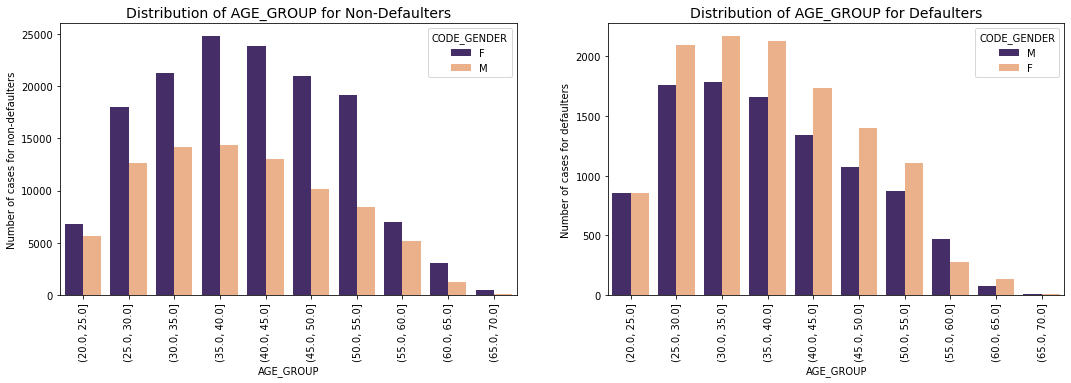

In [47]:
myplotfunc('AGE_GROUP')

#### **Inference** -
- Middle aged have higher number of defaulters
- The credit rate for female is high and the age between 30 to 55 having more apllicants number the male defaulters percentage is more than that of male non defaulters in age range 25 to 40.

-  ###  Subtask 4.3: Univariate Analysis - Continuous Variables

In [48]:
# Creating a re-usable function for univariate analysis of continous variables
def myplothist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(df_target0[var])
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.distplot(df_target1[var])
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

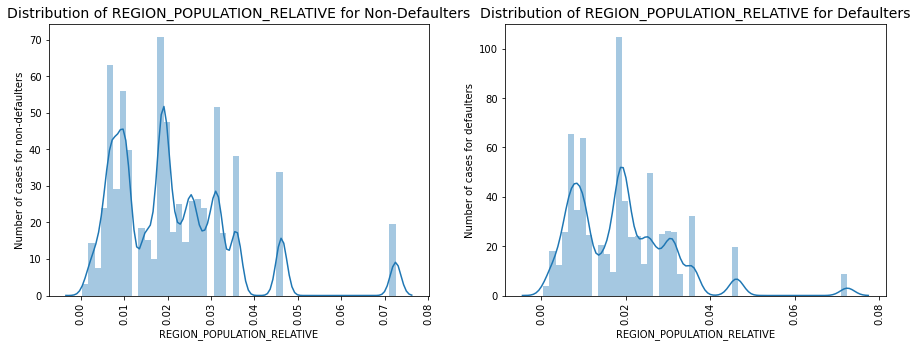

In [49]:
myplothist('REGION_POPULATION_RELATIVE')

#### **Inference**
- the population relative more with respect to the no-defaulters 
- The distribution is more for defaulters having region population 0.02

-  ###  Subtask 4.4: Segmented Analysis

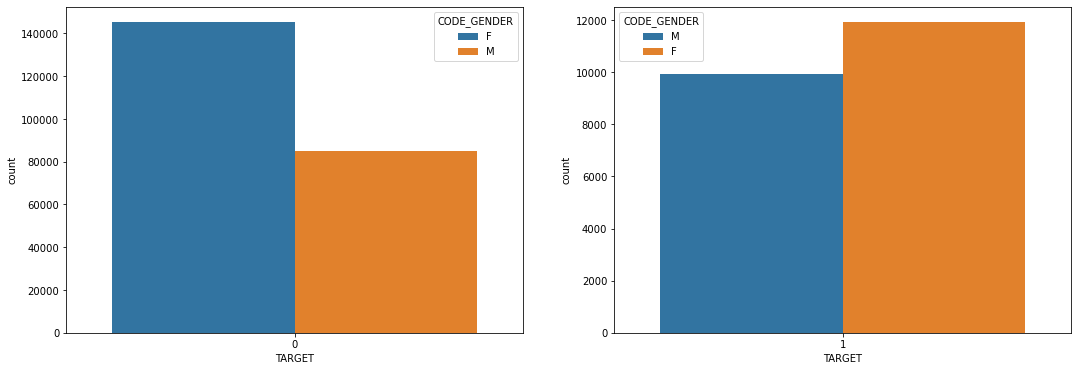

In [50]:
# segemented analysis for male and female by TARGET variable
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df_target0)
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df_target1)
plt.show()

#### **Inference**-
- The female count is more than that of male count in applicants
- The percentage of male defaulters are more than that of malle non-defaulters

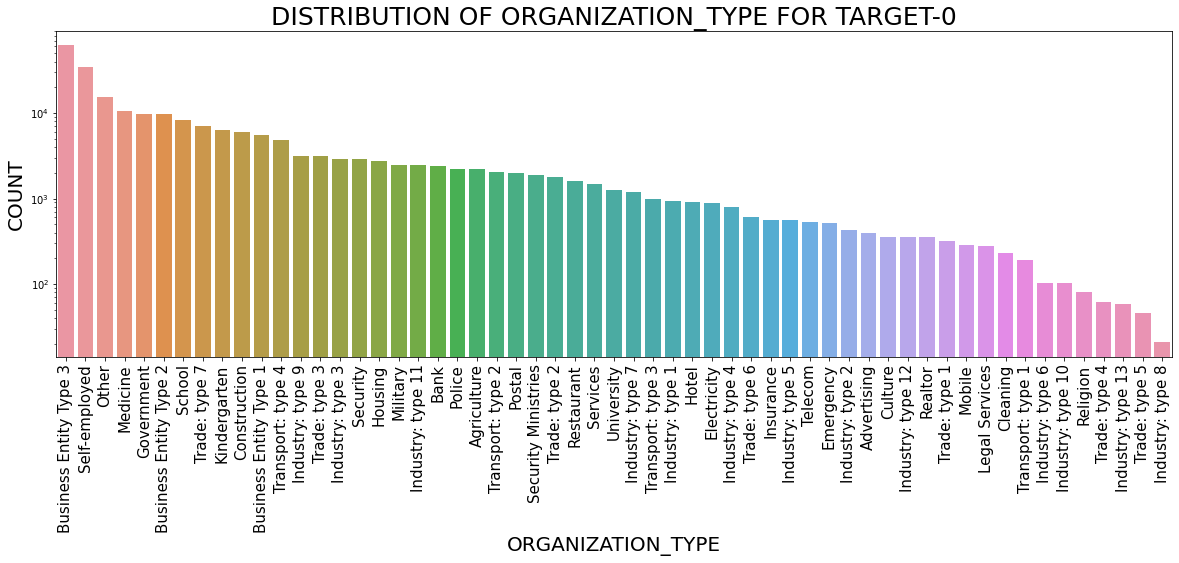

In [51]:
#distribution plot of organization type for target-0
plt.figure(figsize=[20,6])
plt.yscale('log')
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('ORGANIZATION_TYPE',fontsize=20)
sns.countplot(data=df_target0,x='ORGANIZATION_TYPE',order=df_target0['ORGANIZATION_TYPE'].value_counts().index)
plt.ylabel('COUNT',fontsize=20)
plt.title('DISTRIBUTION OF ORGANIZATION_TYPE FOR TARGET-0',FONTSIZE=25)
plt.show()

#### **Inference**

- Most of the clients who have applied for credits are from "Business Entity Type 3", "Self-employed", "Other","Medicine", "Government", "Business Entity Type 2"

- less number of clients are from "Industry:type 6", "Industry:type 10", "Religion", "Trade:type 4", "Industry:type 13", "Trade:type 5", "Industry:type 8"

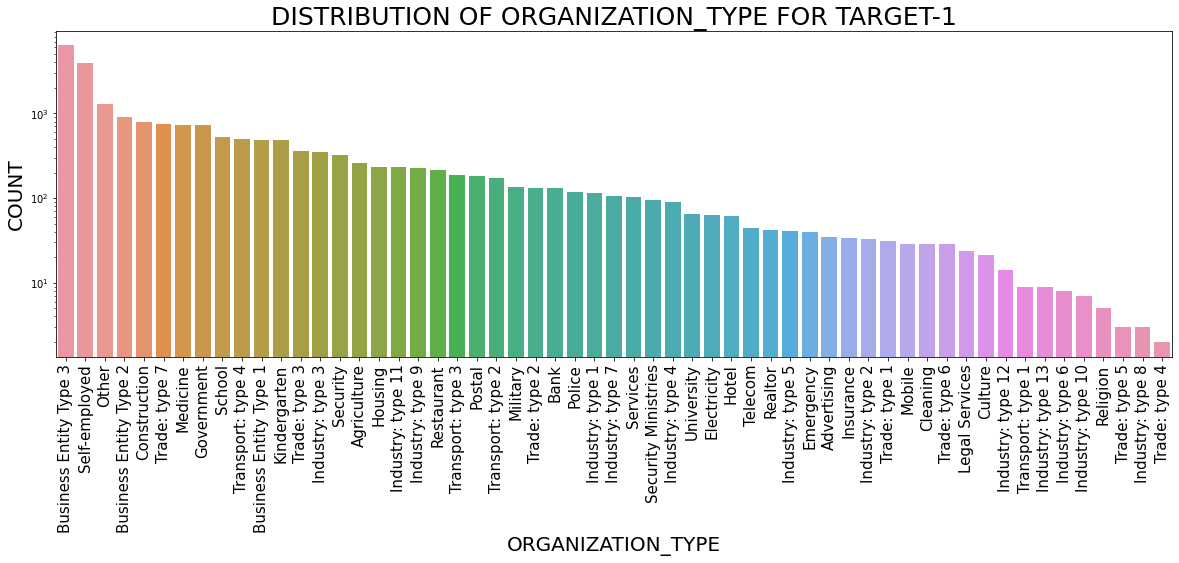

In [52]:
#Distribution plot for organization type  for target-1
plt.figure(figsize=[20,6])
plt.yscale('log')
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('ORGANIZATION_TYPE',fontsize=20)
sns.countplot(data=df_target1,x='ORGANIZATION_TYPE',order=df_target1['ORGANIZATION_TYPE'].value_counts().index)
plt.ylabel('COUNT',fontsize=20)
plt.title('DISTRIBUTION OF ORGANIZATION_TYPE FOR TARGET-1',FONTSIZE=25)
plt.show()

#### **Inference**
- Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.

- Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

Same as type 0 in distribution of organization type.

-  ###  Subtask 4.5: Bi-variate Analysis - TARGET 0

In [53]:
#check the target-0 dataframe
df_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,AMT_INCOME_TOTAL_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,46.0,"(45.0, 50.0]",High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,52.0,"(50.0, 55.0]",Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52.0,"(50.0, 55.0]",Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,55.0,"(50.0, 55.0]",Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other,46.0,"(45.0, 50.0]",Low


In [54]:
#check the target-1 data frame
df_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,AMT_INCOME_TOTAL_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,26.0,"(25.0, 30.0]",High
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,51.0,"(50.0, 55.0]",Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,48.0,"(45.0, 50.0]",High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,THURSDAY,11,0,0,0,0,0,0,Self-employed,37.0,"(35.0, 40.0]",Medium
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,28.0,"(25.0, 30.0]",Very-High


In [55]:
# showing columns of target 0
df_target0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE', 'AGE_GROUP', 'AMT_INCOME_TOTAL_GROUP'],
      dtype='object')

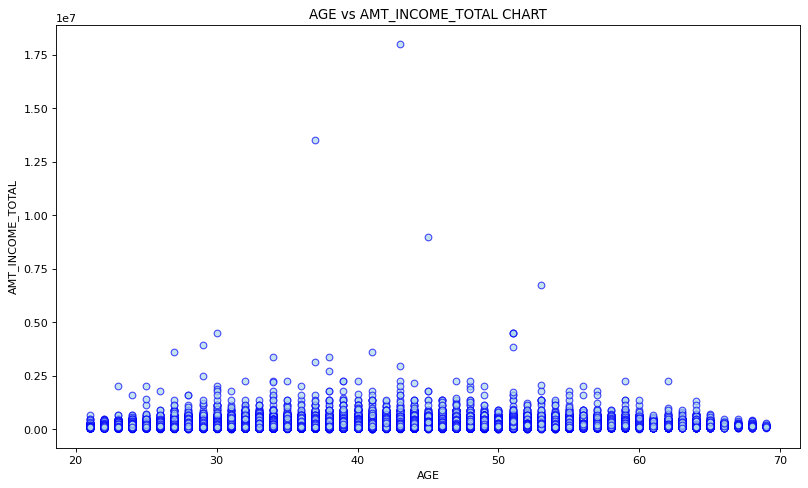

In [56]:
#scatter plot for target-0 amount of income and age
plt.figure(figsize=[12,7],dpi=80)
plt.scatter(df_target0.AGE,df_target0.AMT_INCOME_TOTAL,edgecolors='b',alpha=0.7,facecolor='lightblue')
plt.xlabel('AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('AGE vs AMT_INCOME_TOTAL CHART')
plt.show()


#### Inference-
- Amount of income is high in the age 30 to 50 for the defaulters.
- Some clients having higest income at age of 35 to 40

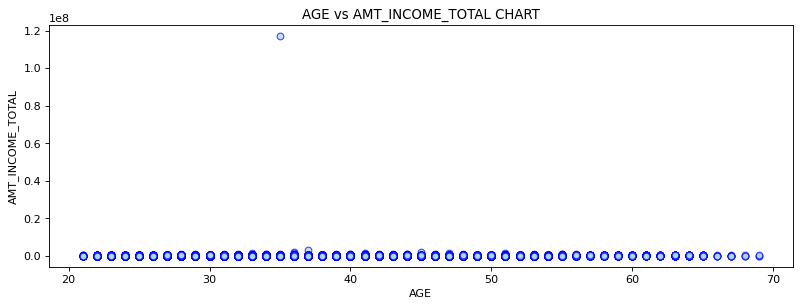

In [57]:
#scatter plot for target-1 by using amount income with age
plt.figure(figsize=[12,4],dpi=80)
plt.scatter(df_target1.AGE,df_target1.AMT_INCOME_TOTAL,edgecolors='b',alpha=0.7,facecolor='lightblue')
plt.xlabel('AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('AGE vs AMT_INCOME_TOTAL CHART')
plt.show()

#### Inference-
- The amount of income is low for the defaulters irrespective of there age

### For Target-0 - Finding any outliers

In [58]:
#function for plot
def univariate_numerical0(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
   
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=df_target0, x=col,orient='v')
    plt.show()

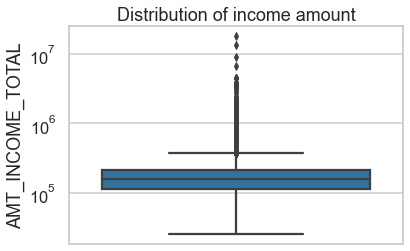

In [59]:
# Distribution of income amount

univariate_numerical0(data=df_target0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')


#### **Inference**
- There are some outliers in the income amount column.
- The third quartiles is very slim for income amount.

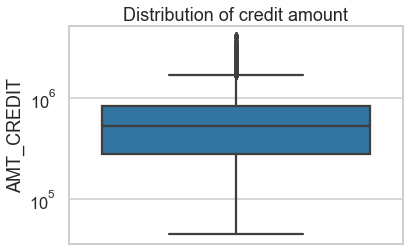

In [60]:
# Disrtibution of credit amount

univariate_numerical0(data=df_target0,col='AMT_CREDIT',title='Distribution of credit amount')

#### **Inference**
- The column contains some outliers.

- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile

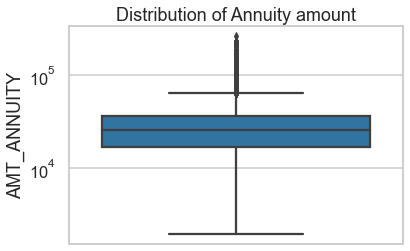

In [61]:
# Distribution of anuuity amount

univariate_numerical0(data=df_target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### **Inference**
- Some outliers are noticed in annuity amount.

- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

In [62]:
#value counts by family status
df_target0.NAME_FAMILY_STATUS.value_counts()

Married                 150725
Single / not married     35197
Civil marriage           23463
Separated                14608
Widow                     6307
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [63]:
#drop the unknown as these are outliers
df_target0=df_target0.drop(df_target0[df_target0['NAME_FAMILY_STATUS']=='Unknown'].index)

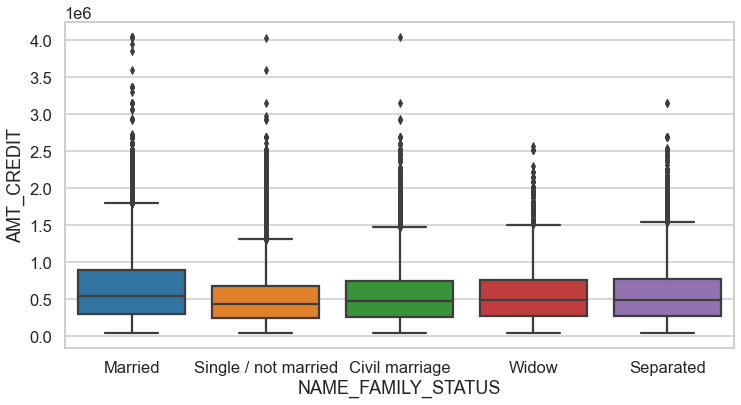

In [64]:
#box plot to show the data point distributions and outliers detection
plt.figure(figsize=[12,6])
sns.boxplot(df_target0['NAME_FAMILY_STATUS'],df_target0['AMT_CREDIT'])
plt.show()

#### **Inference**-
- The Married persons took more credit than that of others
- single/not married persons take less amount of credit that that of others and some outliers also contains in this category

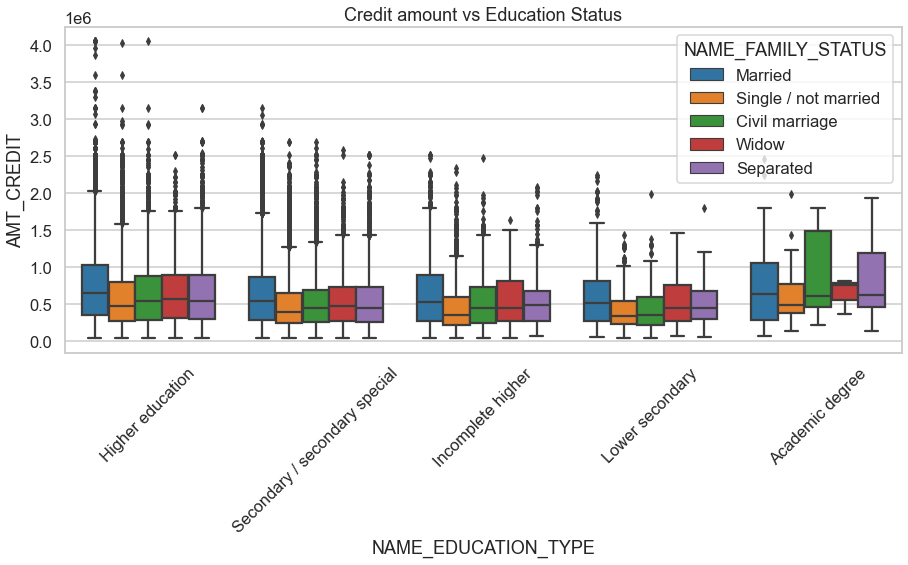

In [65]:
#box plot to check the outliers and distribution data points in quantile
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.boxplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### **Inference**-
- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

- Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.

- Civil marriage for Academic degree is having most of the credits in the third quartile.

In [66]:

df_target0=df_target0[~df_target0['AMT_GOODS_PRICE'].isnull()]

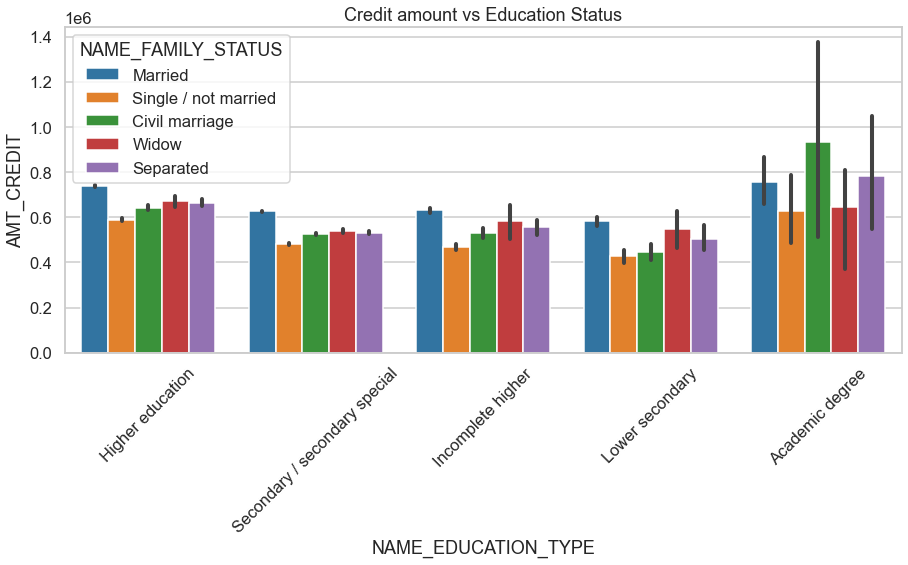

In [67]:
# bar plot to show the distribution ofeducation wrt to amt_credit
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status')
plt.show()

#### **Inference**
- Amount of credit is high incase of Higher education and Academic degree populations married persons took more credit than others
- Amount of credit is minimum for the populations having lower secondary education and all type of family status

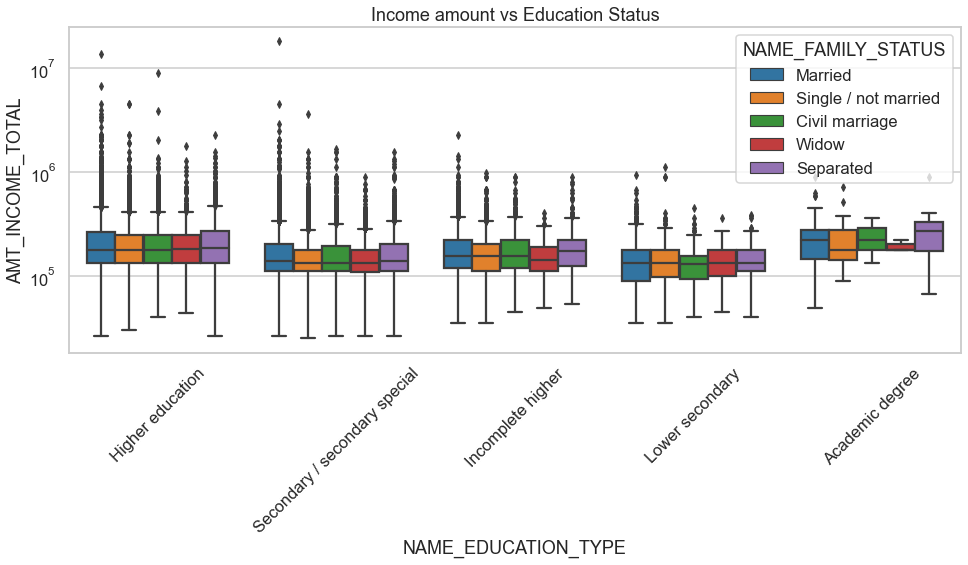

In [68]:
#box plot to check the outliers and distributions
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### **Inference**-
- For Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.

- Less outlier are there in Academic degree but there income amount is little higher that Higher education.

- Lower secondary of civil marriage family status are having" less income amount than others.

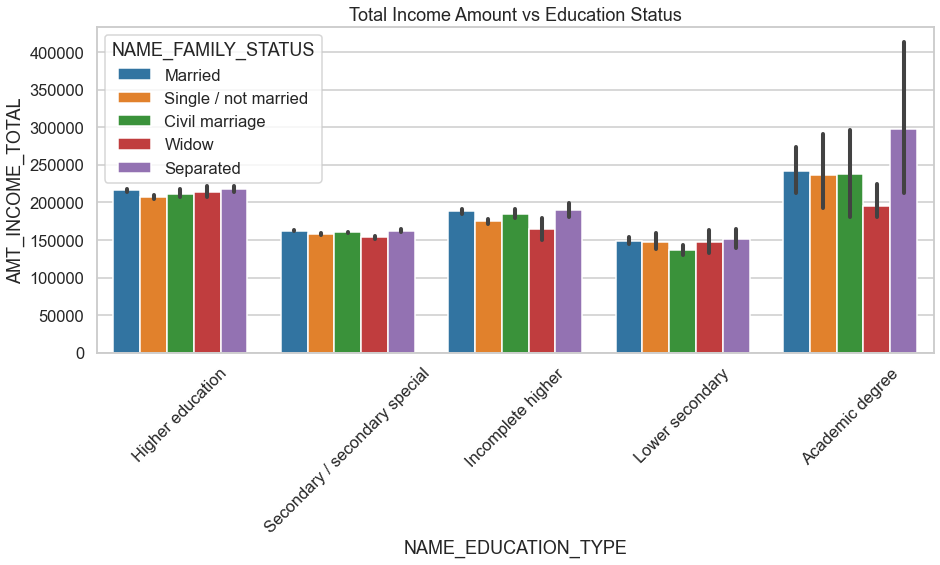

In [69]:
#bar plot for income amount vs education status
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Total Income Amount vs Education Status')
plt.show()

#### **Inference**
- Persons having higher education and Academic degree having high amount of income irrespective of there familly status
- Amount of income is minimum for lower secondary persons irrespective of there family status

### For Target-1 - Finding any outliers

In [70]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical1(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    #plt.rcParams["axes.labelsize"] = 20
    #plt.rcParams['axes.titlesize'] = 22
    #plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=df_target1, x=col,orient='v')
    plt.show()

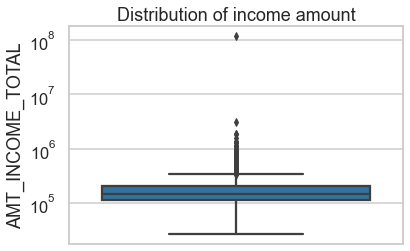

In [71]:
# Distribution of income amount

univariate_numerical1(data=df_target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### **Inference**
- Some outliers are noticed in income amount.

- The third quartiles is very slim for income amount.

- Most of the clients of income are present in first quartile

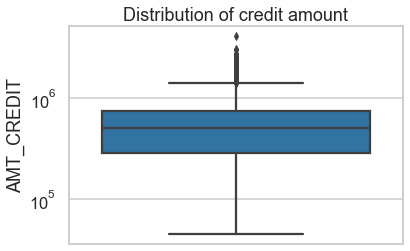

In [72]:
# Distribution of credit amount

univariate_numerical1(data=df_target1,col='AMT_CREDIT',title='Distribution of credit amount')

#### **Inference**
- Some outliers are noticed in credit amount.

- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

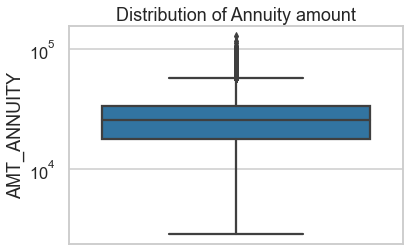

In [73]:
# Distribution of Annuity amount

univariate_numerical1(data=df_target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### **Inference**
- Some outliers are noticed in annuity amount.

- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

-  ###  Subtask 4.6: Bi-variate Analysis - TARGET 1

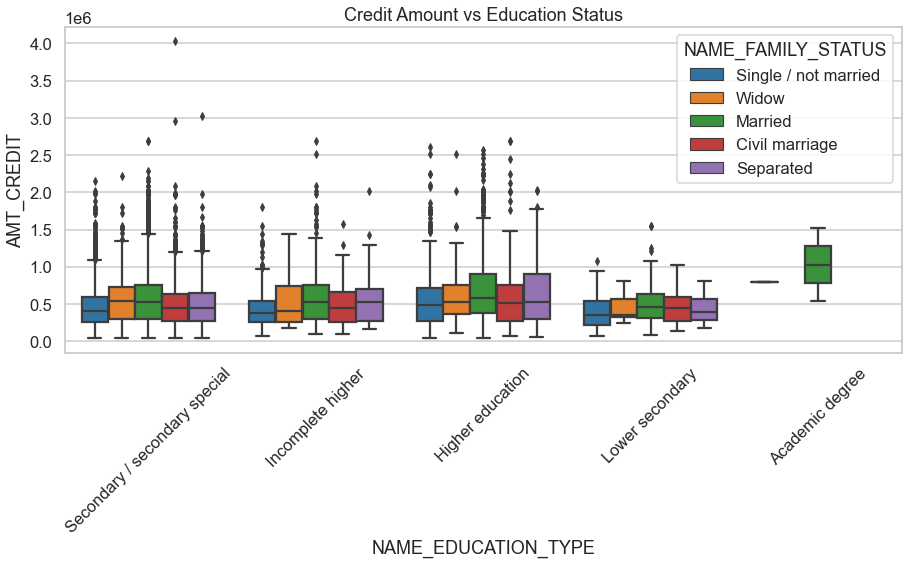

In [74]:
# Boxplot for credit amount Vs Education Type

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### **Inference**-
- In all the section of education Status married people have taken more credits.

- for Academic degree section data of only married people is available and don't have any outliers.

- Most outliers are from Secondary special , incomplete higher and higher education.

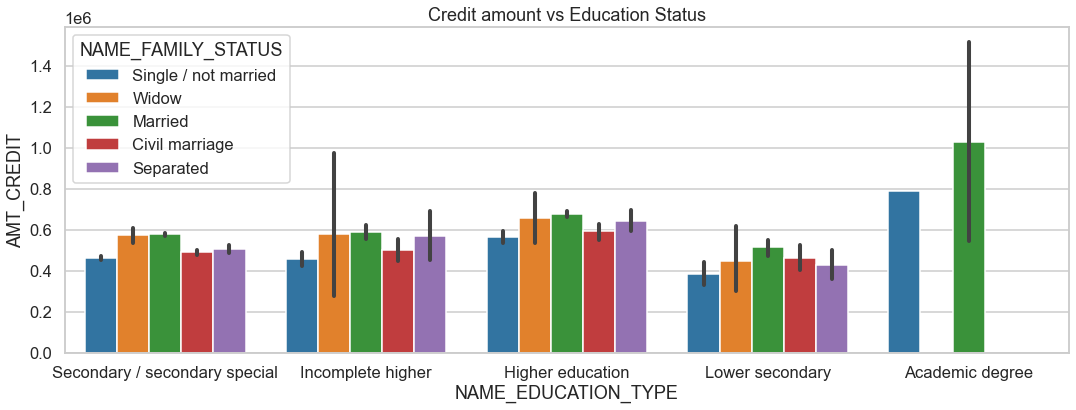

In [75]:
#bar plot for credit amount vs education status for defaulters
plt.figure(figsize=(18,6))
sns.barplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status')
plt.show()

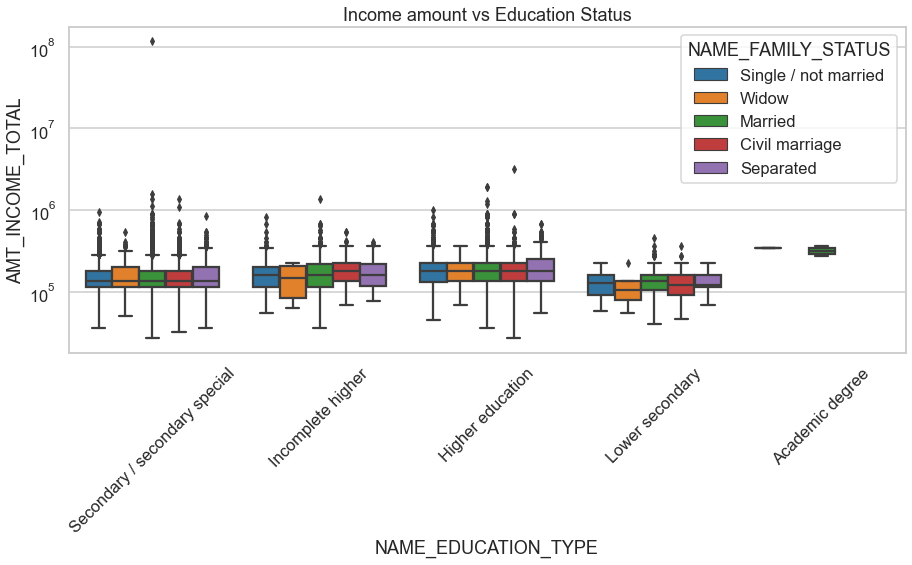

In [76]:
# Boxplot for Income amount in logarithmic scale

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### **Inference**-
- Married Category is having more number of outliers in all the education categories and having more vlues in the first quartile.

- Lower secondary have less income amount than others.

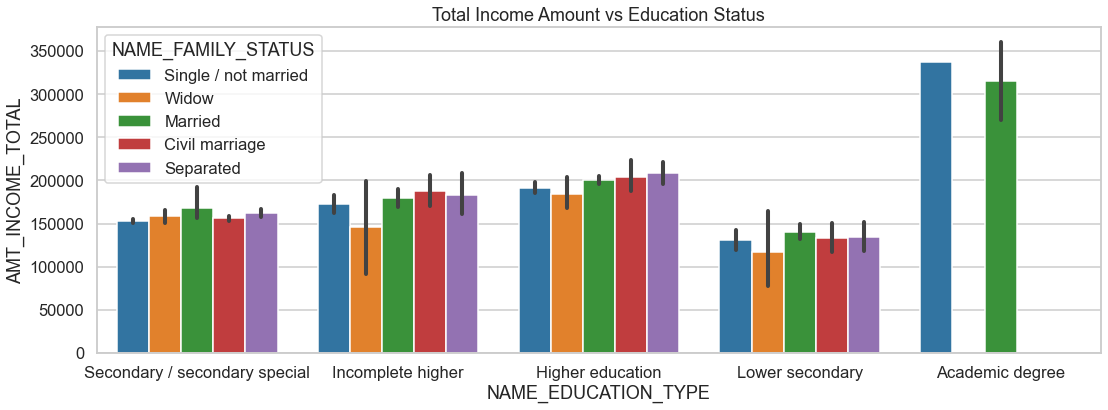

In [77]:
#bar plot of education status vs total income amount for defaluters
plt.figure(figsize=(18,6))

sns.barplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Total Income Amount vs Education Status')
plt.show()

#### **Inference**
- Married and single/not married Category is having Academic Degree have highest amont of income in total 

- Lower secondary have less income amount than others.

-  ###  Subtask 4.7: Bi-variate Analysis - Defaulters and Non-Defaulters

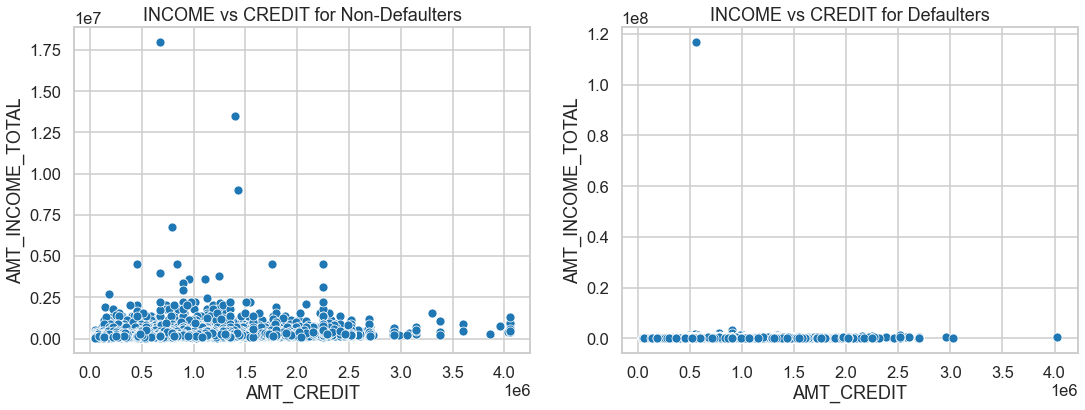

In [78]:
#scatter subplot for incove vs credit dor defaulter and others
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df_target0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df_target1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

#### **Inference**
- the nondefaulters took more credit as compared there income also
- Defaulters having more amount of credit but there income is not that much high so its risky to give credit for defaulters. 

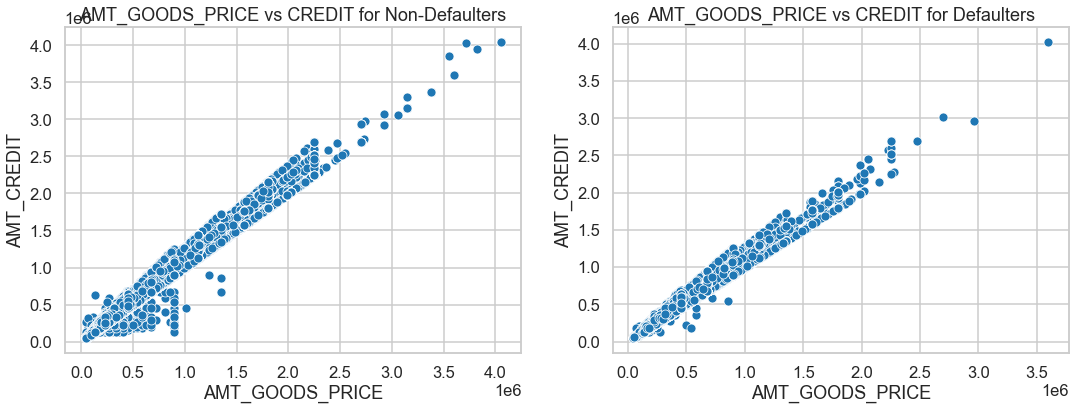

In [79]:
#scatter plot for good price vs credit for defaulters and others
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE',data=df_target0)
plt.title('AMT_GOODS_PRICE vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE',data=df_target1)
plt.title('AMT_GOODS_PRICE vs CREDIT for Defaulters')
plt.show()

#### **Inference**
- Defaulters are less if price of good is upto 500k and amount credit is also less than 500k
- Non-Defaulters the density is high when the amount goods is upto 1000k and the amount credit is upto 1000k

Find correlation for numerical columns for both case, i.e 0 and 1

## Step 5 - Top 10 Correlation between the  variables

In [80]:
#Finding top 10 correlation between variables for non-defaulter catagories
l1=df_target0.corr().unstack()
l1.sort_values(ascending=False).drop_duplicates().head(11)

AGE                          AGE                           1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.986726
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.860317
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.820833
AMT_GOODS_PRICE              AMT_ANNUITY                   0.766932
AMT_ANNUITY                  AMT_CREDIT                    0.761862
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION    0.461754
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY        0.442638
AMT_INCOME_TOTAL             AMT_ANNUITY                   0.400475
DAYS_BIRTH                   DAYS_EMPLOYED                 0.352598
REG_REGION_NOT_LIVE_REGION   REG_CITY_NOT_LIVE_CITY        0.342459
dtype: float64

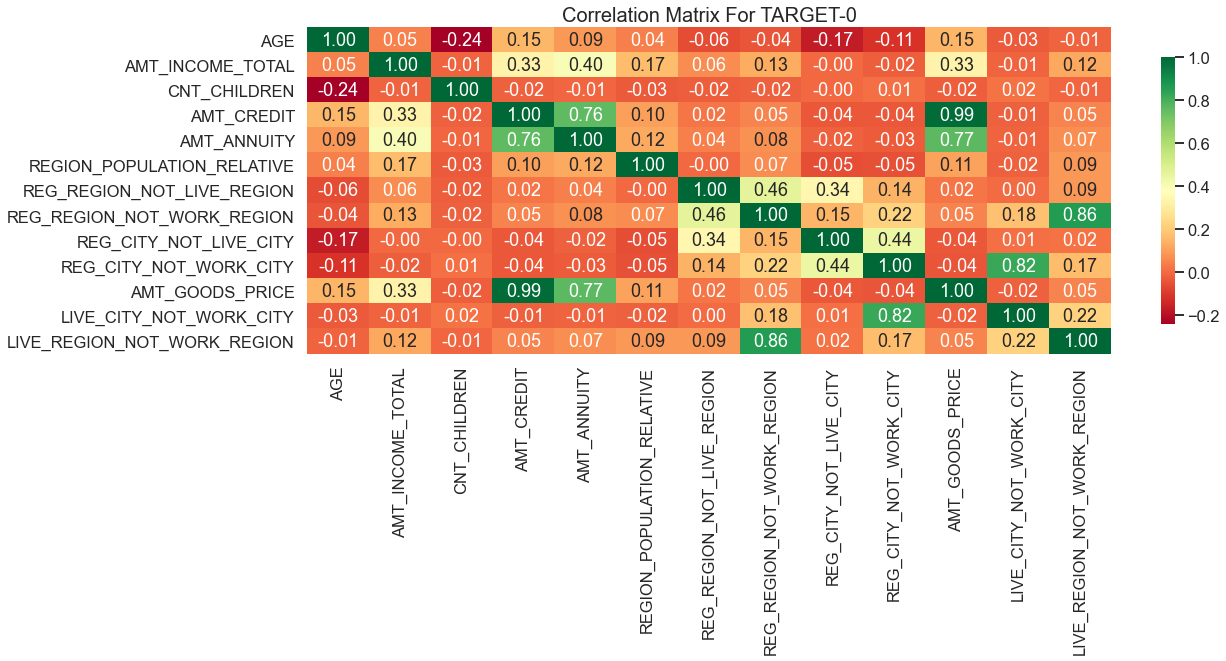

In [81]:
#plotting heat map to show the correlation
plt.figure(figsize=[18,6])
sns.heatmap(df_target0[['AGE','AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','AMT_GOODS_PRICE','LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION']].corr(),cmap='RdYlGn',annot=True,fmt='.2f',cbar_kws={"shrink": .82})
plt.xticks(rotation=90)
plt.title('Correlation Matrix For TARGET-0',fontsize=20)
plt.show()

#### **Inference**-
- Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

- Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

- Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.

- clients have less children in densely populated area.

- Credit amount is higher to densely populated area.

- The income is also higher in densely populated area.

In [82]:
# top 10 correlation between variables in Defaulter categories
l2=df_target1.corr().unstack()
l2.sort_values(ascending=False).drop_duplicates().head(13)

AGE                          AGE                            1.000000
AMT_CREDIT                   AMT_GOODS_PRICE                0.982799
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.768247
AMT_ANNUITY                  AMT_GOODS_PRICE                0.749379
                             AMT_CREDIT                     0.748708
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.506747
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.478266
                             REG_REGION_NOT_LIVE_REGION     0.322030
DAYS_BIRTH                   DAYS_EMPLOYED                  0.307018
DAYS_REGISTRATION            DAYS_BIRTH                     0.241202
LIVE_CITY_NOT_WORK_CITY      LIVE_REGION_NOT_WORK_REGION    0.233975
REG_REGION_NOT_WORK_REGION   REG_CITY_NOT_WORK_CITY         0.224370
dtype: float64

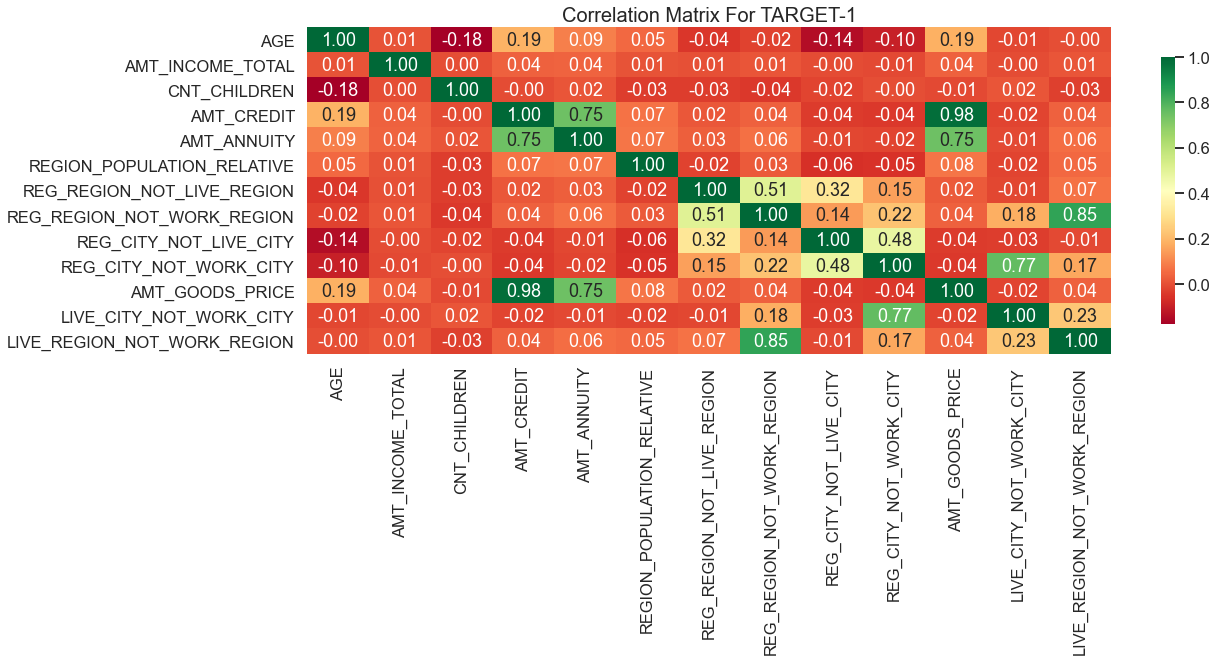

In [83]:
#plotting heat map to show the correlation in variablles  for defaulters
plt.figure(figsize=[18,6])
sns.heatmap(df_target1[['AGE','AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','AMT_GOODS_PRICE','LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION']].corr(),cmap='RdYlGn',annot=True,fmt='.2f',cbar_kws={"shrink": .82})
plt.xticks(rotation=90)
plt.title('Correlation Matrix For TARGET-1',fontsize=20)
plt.show()

#### **Inference**-
**Most of the observations are same as of target0 correlation heatmap, but few new points observed are**

- The client's permanent address does not match contact address are having less children and vice-versa

- The client's permanent address does not match work address are having less children and vice-versa

## Step 6 - Previous_Application data set

-  ###  Subtask 6.1: Reading and inspecting data

In [84]:
#loading the data set
df_prevdata=pd.read_csv('previous_application.csv')

In [85]:
#show the head of data
df_prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#check shape of data
df_prevdata.shape

(1670214, 37)

In [87]:
#check the datatypes of variable and the columns data
df_prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [88]:
#describe the numerical columns 
df_prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


-  ###  Subtask 6.2: Data Cleaning

In [89]:
#checking for the null values sum 
df_prevdata.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [90]:
#finding % of null values contains in data set for each columns
(df_prevdata.isnull().sum()/len(df_prevdata.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [91]:
#columns contains more than 50% data loss
emptydata1=df_prevdata.isnull().sum()
emptydata1=emptydata1[emptydata1.values>(0.5*len(df_prevdata))]
emptydata1 

AMT_DOWN_PAYMENT             895844
RATE_DOWN_PAYMENT            895844
RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
dtype: int64

In [92]:
#no. of columns having loss of data more than 50%
len(emptydata1)

4

In [93]:
#drop the columns having such high amount of data missing
emptydata1=list(emptydata1.index)
df_prevdata=df_prevdata.drop(labels=emptydata1,axis=1)
df_prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#checking the columns having missing values
df_prevdata.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [95]:
#Dropping columns where missing values are greater than 20% in mean
df_prevdata= df_prevdata.loc[:, df_prevdata.isnull().mean() <= .20]

In [96]:
#preview the data set check for null values still there
df_prevdata.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [97]:
#shape of data after droping null values
df_prevdata.shape

(1670214, 23)

In [98]:
#drop the missing values rows as these are insignificant in numbers
df_prevdata.dropna(axis=0,inplace=True)

In [99]:
#shape of data after droping null values
df_prevdata.shape

(1669867, 23)

In [100]:
#columns after drop
df_prevdata.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [101]:
#check the columns contains missing values
df_prevdata['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [102]:
#dropping the datas those are missing
df_prevdata=df_prevdata.drop(df_prevdata[df_prevdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prevdata=df_prevdata.drop(df_prevdata[df_prevdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_prevdata.shape

(69635, 23)

In [103]:
# Now merging the Application dataset with previous appliaction dataset

df_comdata=pd.merge(left=df_application,right=df_prevdata,how='inner',on='SK_ID_CURR')
df_comdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,AMT_INCOME_TOTAL_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,28.0,"(25.0, 30.0]",Low,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,42.0,"(40.0, 45.0]",Very-High,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,32.0,"(30.0, 35.0]",Very-High,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,44.0,"(40.0, 45.0]",High,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,44.0,"(40.0, 45.0]",High,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


In [104]:
# columns after merging
df_comdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE', 'AGE_GROUP', 'AMT_INCOME_TOTAL_GROUP',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_

In [105]:
#shape of data frame after merging
df_comdata.shape

(51420, 55)

-  ###  Subtask 6.3: Univariate Analysis

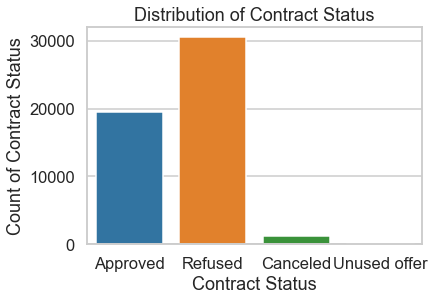

In [106]:
# count plot to see the status of clients application
sns.countplot(df_comdata.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

### DIVIDING THE DATA SET TO 4 CATEGORIES FOR ANALYSIS

In [107]:
# 4 dataframe contains 4 categories of status of application
approved=df_comdata[df_comdata.NAME_CONTRACT_STATUS=='Approved']
refused=df_comdata[df_comdata.NAME_CONTRACT_STATUS=='Refused']
canceled=df_comdata[df_comdata.NAME_CONTRACT_STATUS=='Canceled']
unused=df_comdata[df_comdata.NAME_CONTRACT_STATUS=='Unused Offer']

In [108]:
# common function for plotting
def cat_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=15)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=15)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=15)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()
    

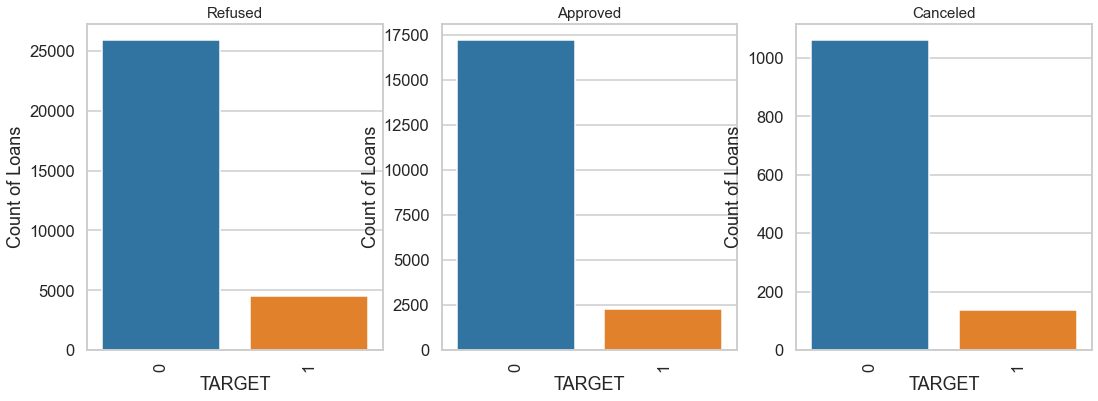

In [109]:
cat_func('TARGET')

In [110]:
refused.TARGET.value_counts(normalize=True)

0    0.850662
1    0.149338
Name: TARGET, dtype: float64

In [111]:
approved.TARGET.value_counts(normalize=True)

0    0.882576
1    0.117424
Name: TARGET, dtype: float64

In [112]:
canceled.TARGET.value_counts(normalize=True)

0    0.886572
1    0.113428
Name: TARGET, dtype: float64

Inference-Loans which were previously refused  have a higher default rate

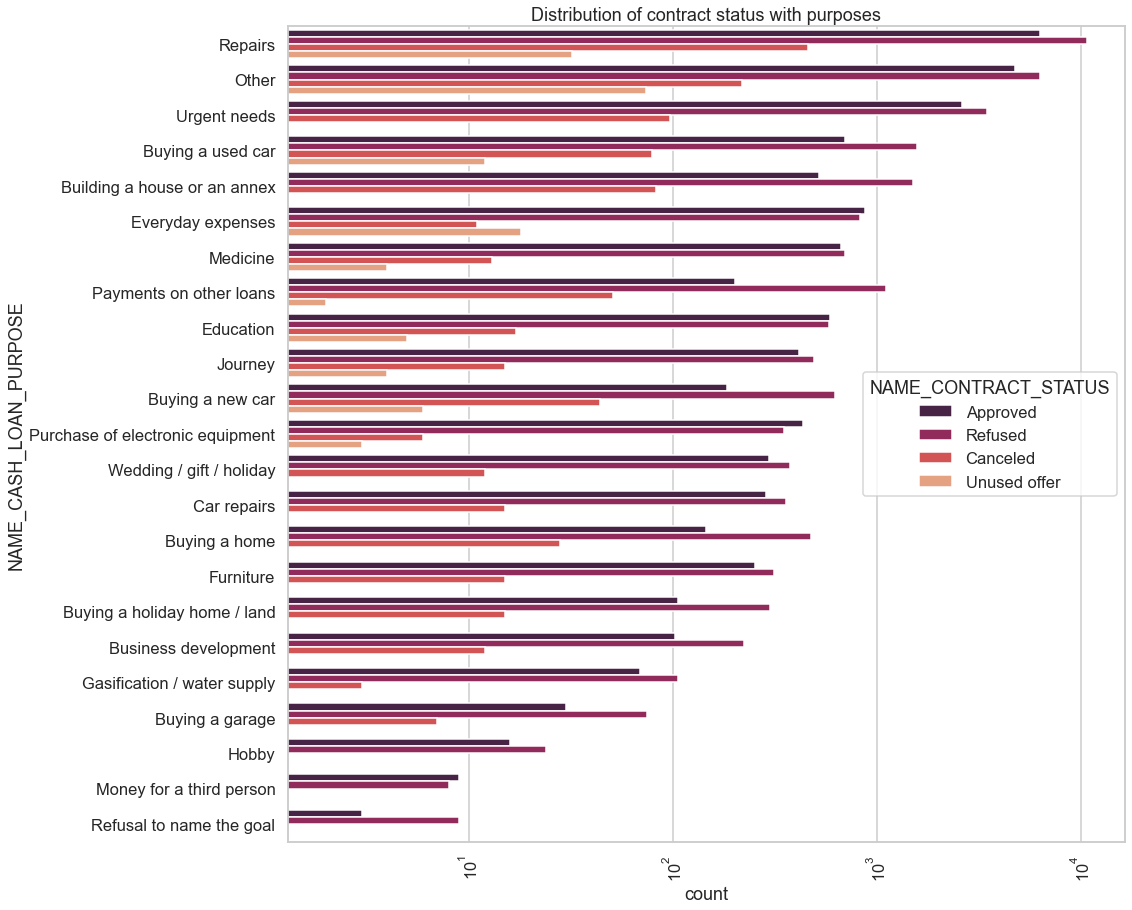

In [113]:
#distribution of contract status with purpose
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data =df_comdata, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comdata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='rocket')
plt.show()

#### **Inference**
- Most rejection of loans came from purpose 'repairs'.

- For Medicine purposes we have equal number of approvals and rejection.

- 'Payments on other loans', 'buying a new car' and 'buying a home' has significantly higher rejection than approvals.

- only 'Money for a third person', 'Purchase of electronic equipment' and 'Education' has higher loan approval than rejections.

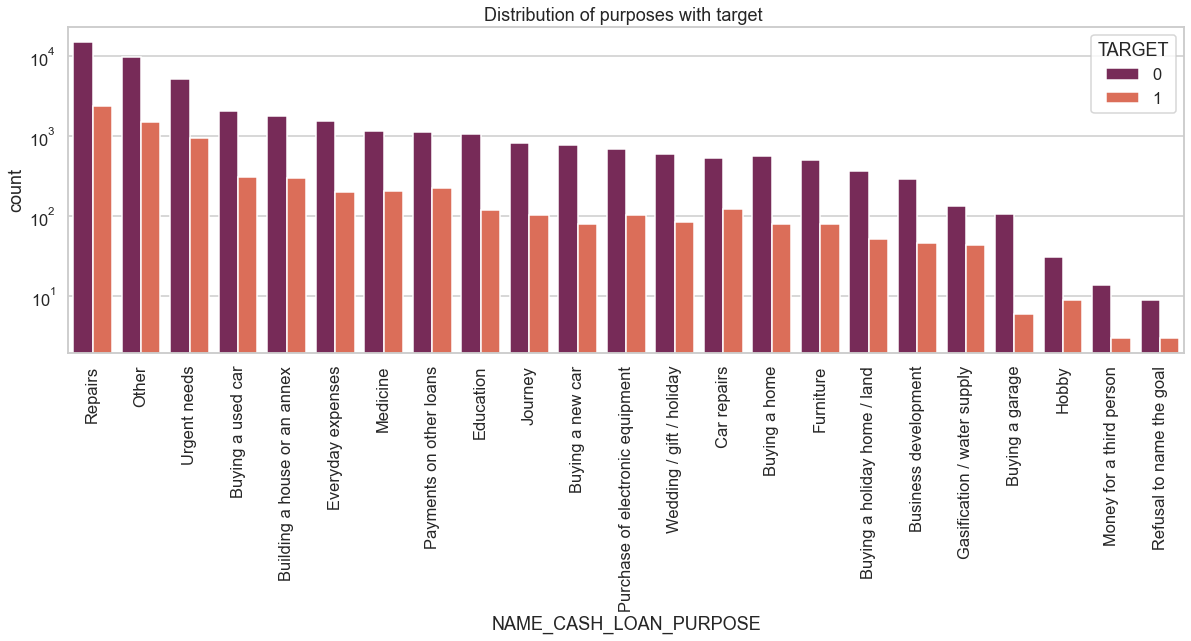

In [114]:
# Distribution of contract status with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data =df_comdata, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comdata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rocket')
plt.show()

#### **Inference**
- Loan purposes with 'Repairs' are facing more difficulites in payment on time.
- There are few places where loan payment is significantly higher than facing difficulties. They are 'Refusal to the name goal’, 'Money for a third person', 'Buying a garage'. Hence, we can focus on the purposes for which the client has minimal payment difficulties.

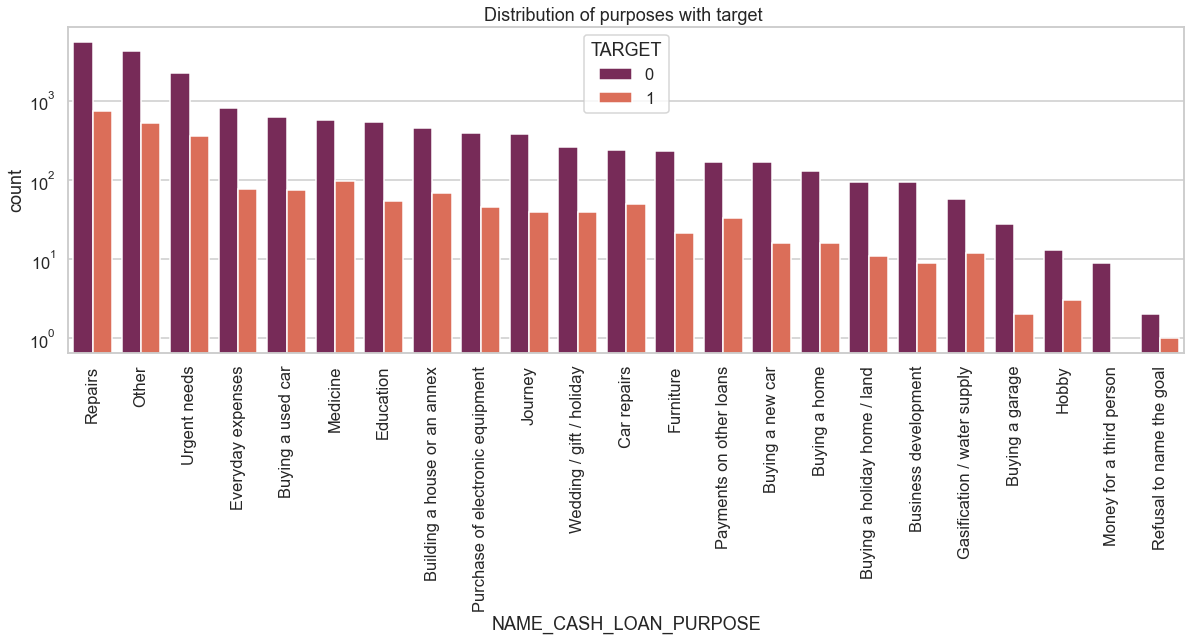

In [115]:
# Distribution plot for loan purpose wrt to previous approved application clients
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data =approved, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=approved['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rocket')
plt.show()

#### **Inference**
- Most of the loan got approved for the `Repairs` purpose and more successful payments also achieved


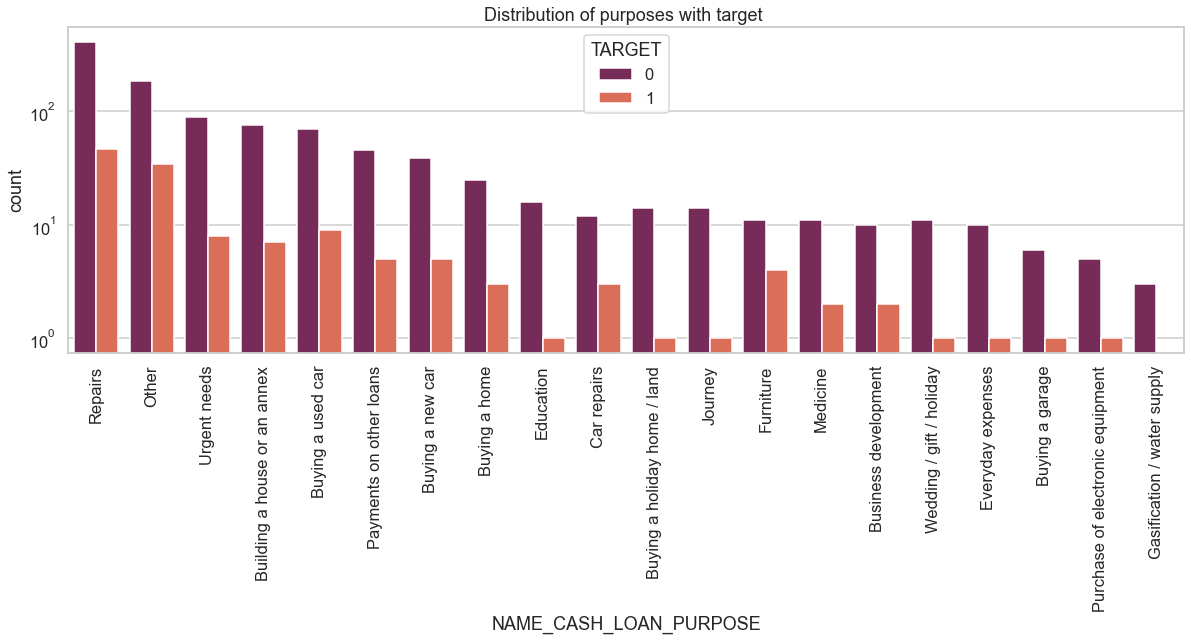

In [116]:
# Distribution plot for loan purpose wrt to previous cancelled application clients
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data =canceled, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=canceled['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rocket')
plt.show()

#### **Inference**
- Most of the loan got cancelled from the `Repairs` purpose and more successful payments are from this section

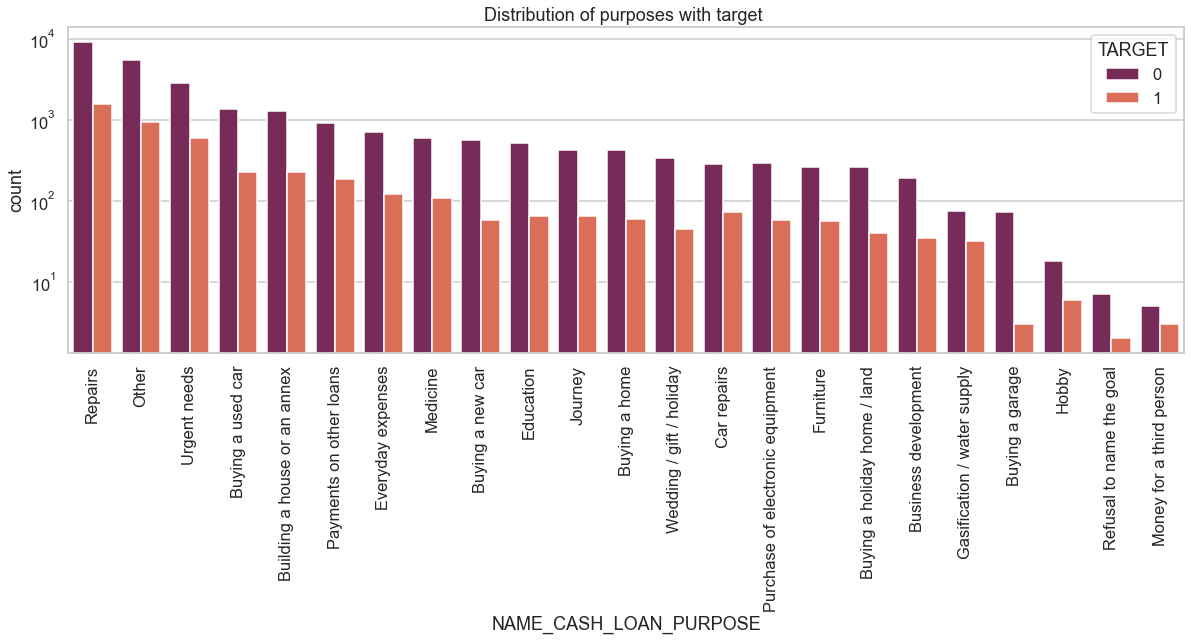

In [117]:
# Distribution plot for loan purpose wrt to previous refused application clients
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data =refused, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=refused['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='rocket')
plt.show()

#### **Inference**
- Bank rejected most of the loan for repair purpose bank should look at this section as this can contains more no of sucessful payments than the unsucessful payments.

-  ###  Subtask 6.3: Bi-variate Analysis

In [118]:
df_comdata['AMT_CREDIT_PREV']=df_comdata['AMT_CREDIT_y']

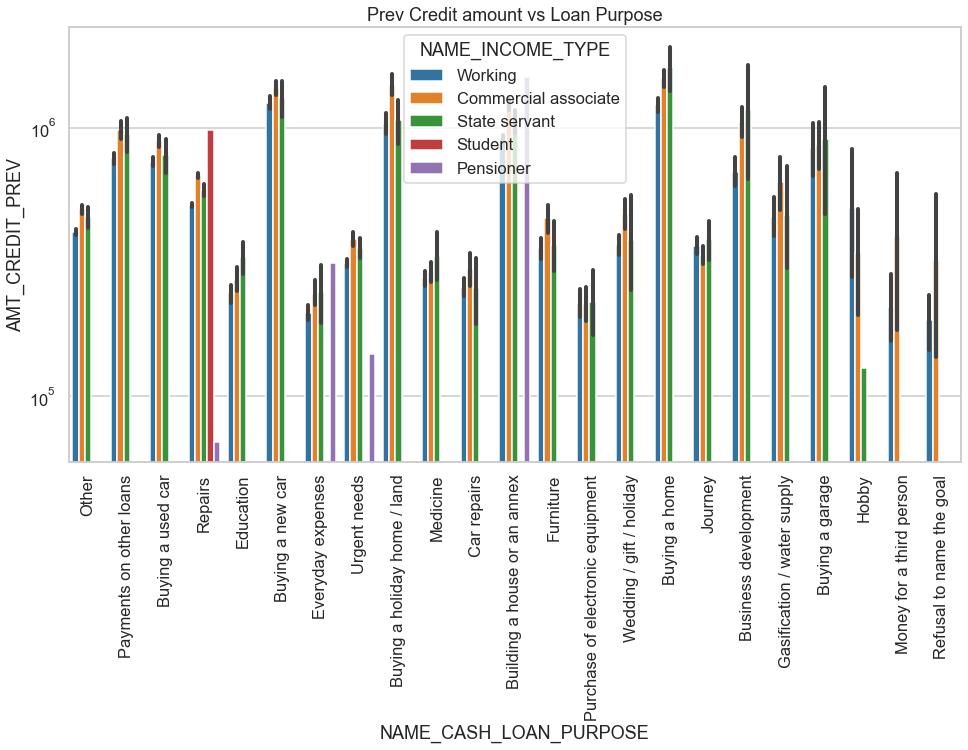

In [119]:
# Barplot for Credit amount in logarithmic scale

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =df_comdata, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### **Inference**
- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

- Income type of state servants have a significant amount of credit applied

- 'Puchase of electronic equipment', 'Hobby', 'Refusal to the name the goal', 'Everyday expenses' is having less credits applied for.

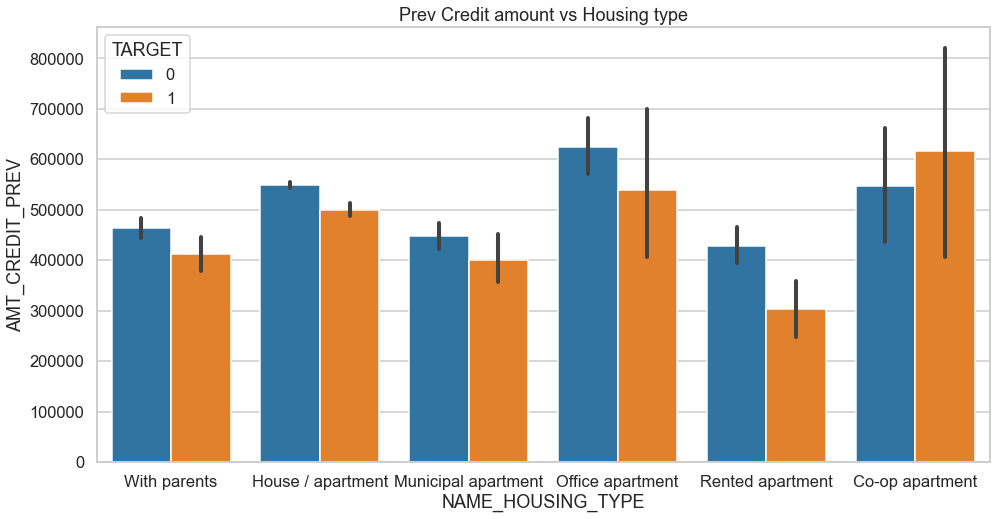

In [120]:
# Barplot for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,8))
plt.xticks(rotation=0)
sns.barplot(data =df_comdata, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### **Inference**
- Housing Tppe as "office appartment" have higher credit for target 0.

- Co-op apartment has higher credit for target 1.

- So, we can conclude that the bank should avoid giving loans to the housing type of co-op apartment as they have payment difficulties.

- Bank can focus mostly on housing type with parents or House\appartment or municipal appartment for successful payments.

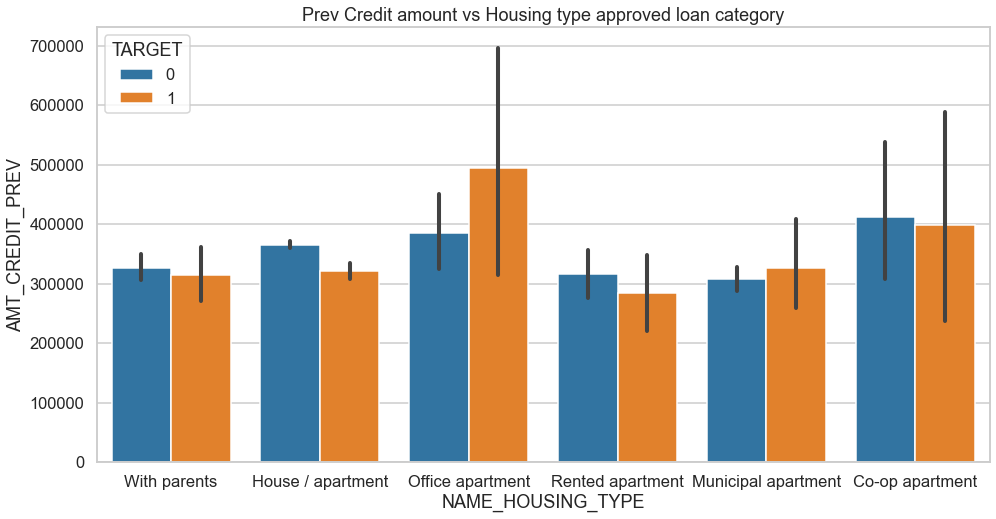

In [121]:
# Barplot for Credit amount prev vs Housing type in logarithmic scale
approved['AMT_CREDIT_PREV']=approved['AMT_CREDIT_y']
refused['AMT_CREDIT_PREV']=refused['AMT_CREDIT_y']
canceled['AMT_CREDIT_PREV']=canceled['AMT_CREDIT_y']
plt.figure(figsize=(16,8))
plt.xticks(rotation=0)
sns.barplot(data =approved, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type approved loan category')
plt.show()

#### **Inference**
- Clients having office appartment have higher approved rate but must of their payments are unsucessful, so bank should not approve such loan categories.

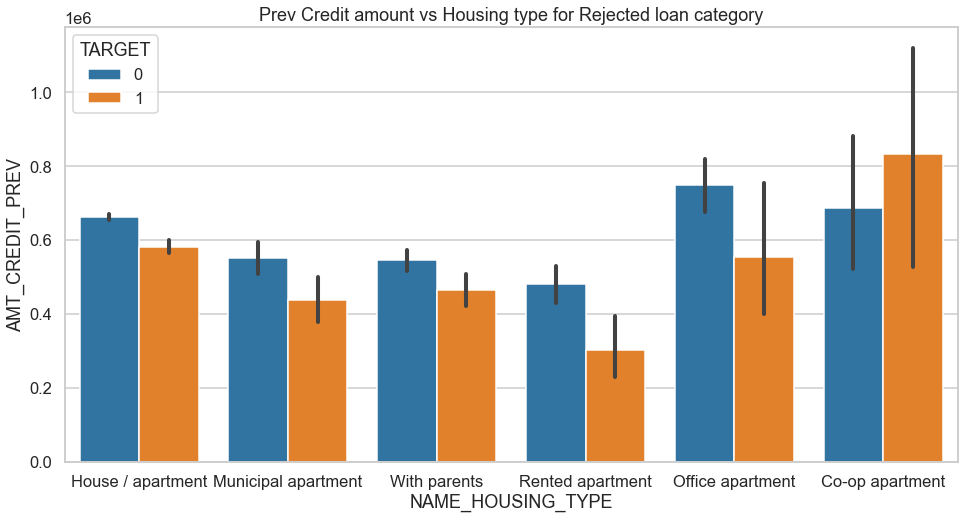

In [122]:
#bar plot for Prev Credit amount vs Housing type for Rejected loan category
plt.figure(figsize=(16,8))
plt.xticks(rotation=0)
sns.barplot(data =refused, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type for Rejected loan category')
plt.show()

#### **Inference**
- Bank should refuse the loan application of clients having housing type "co-op apartment" as they have more defaults.

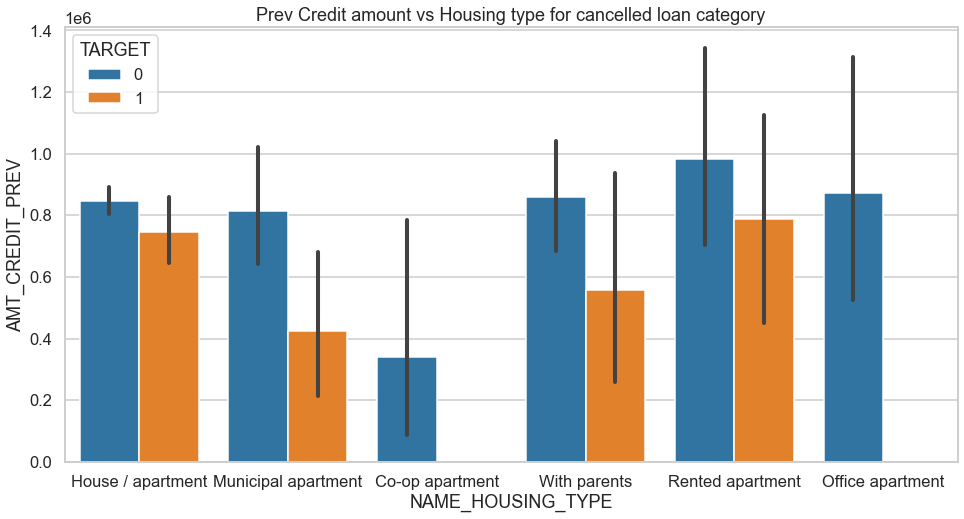

In [123]:
#Prev Credit amount vs Housing type for cancelled loan category
plt.figure(figsize=(16,8))
plt.xticks(rotation=0)
sns.barplot(data =canceled, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type for cancelled loan category')
plt.show()

#### **Inference**
- Bank should target clients having housing type "with parents" as more no. of applications got cancelled from this section but they are most successful payment clients

## CONCLUSION

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. There are less loan applications from customers having high salary and no repayment issues.

3. Banks should focus less on customers with income type as ‘Working’ as they have a greater number of unsuccessful payments.

4. Customers with loan purpose as "Repair" have higher number of unsuccessfull payments.

5. Get as much as clients with housing type as ‘With parents’ as they are having least number of unsuccessful payments.

6. The customers whose applications were previously approved and have housing type as office apartment seem to have a greater number of unsuccessful payments.

7. Bank should not reject the applicants having housing type 'house/apartment', 'muncipal apartment','with parents' as more successful payments achieved from these categories.